In [1]:
#Path del CSV
csvPath = "..\\..\\Data\\chunks.csv"

In [ ]:
#Extracción de los bloques
import chunkParser
mcaPath = "..\\..\\Data\\region_new\\r.0.0.mca"
with open(csvPath,'w') as csvFile:
    chunkParser.mcaCSV(csvFile,mcaPath);

In [2]:
#Path del CSV
csvPath = "..\\..\\Data\\chunks.csv"
#Lectura del CSV
import pandas as pd
df = pd.read_csv(csvPath,delimiter=";",lineterminator="\n")
df = df.rename(columns={"ChunkX": "CX","ChunkZ\r": "CZ"}, errors="raise")
print(df)

           Bid   X    Y   Z      Tag  CX  CZ
0            1   0    0   0  bedrock   0   0
1            2   0    1   0  bedrock   0   0
2            3   0    2   0  bedrock   0   0
3            4   0    3   0    stone   0   0
4            5   0    4   0    stone   0   0
...        ...  ..  ...  ..      ...  ..  ..
1310715  65532  15  251  15      air   1   9
1310716  65533  15  252  15      air   1   9
1310717  65534  15  253  15      air   1   9
1310718  65535  15  254  15      air   1   9
1310719  65536  15  255  15      air   1   9

[1310720 rows x 7 columns]


### Lista de tipos de bloques presentes en el conjunto de datos

In [3]:
#block tipes:
print(df["Tag"].unique())

['bedrock' 'stone' 'gold_ore' 'diorite' 'andesite' 'coal_ore' 'dirt'
 'grass_block' 'air' 'oak_log' 'oak_leaves' 'iron_ore' 'granite'
 'redstone_ore' 'lava' 'gravel' 'dark_oak_leaves' 'grass' 'cave_air'
 'dark_oak_log' 'oak_planks' 'oak_fence' 'lapis_ore' 'cobweb' 'rail'
 'poppy' 'water' 'red_mushroom_block' 'diamond_ore' 'mushroom_stem'
 'spawner' 'red_mushroom' 'infested_stone' 'emerald_ore' 'obsidian' 'sand'
 'clay' 'spruce_leaves' 'spruce_log' 'dandelion' 'brown_mushroom_block'
 'peony' 'sugar_cane' 'tall_seagrass' 'seagrass']


air                     937528
stone                   253468
dirt                     19154
diorite                  15692
bedrock                  15343
andesite                 15037
granite                  14001
cave_air                  7669
dark_oak_leaves           5970
coal_ore                  4396
grass_block               4107
gravel                    3866
oak_leaves                2815
dark_oak_log              2445
iron_ore                  2329
water                     1963
lava                      1727
redstone_ore               538
sand                       449
gold_ore                   250
grass                      247
oak_log                    247
oak_planks                 226
oak_fence                  188
red_mushroom_block         180
infested_stone             158
cobweb                     113
rail                        96
lapis_ore                   88
diamond_ore                 75
clay                        60
spruce_leaves               49
brown_mu

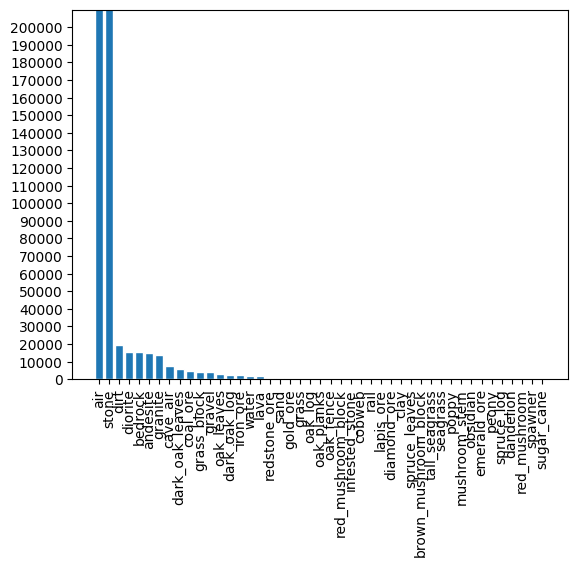

In [4]:
import matplotlib.pyplot as plt 
import numpy as np
# make data:
x = df["Tag"].value_counts().axes[0]
y = df["Tag"].value_counts()
print(y)
# plot
fig, ax = plt.subplots()

ax.bar(x, y, width=0.8, edgecolor="white")

ax.set(xticks=np.arange(0, len(x)),
       ylim=(0, 210000), yticks=np.arange(0, 210000,10000))

plt.xticks(rotation=90)
plt.show()

- De este gráfico vemos que hay un gran porcentaje del mapa que esta formado por bloques de aire y bloques piedra. Esto nos lleva a pensar que la cantidad de bloques esta muy desproporcionada es decir que tenemos un conjunto de datos desbalanceado.

### Distribución de los bloques de aire en el mapa

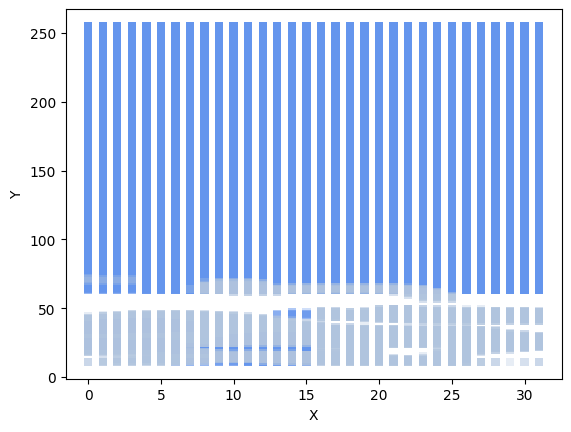

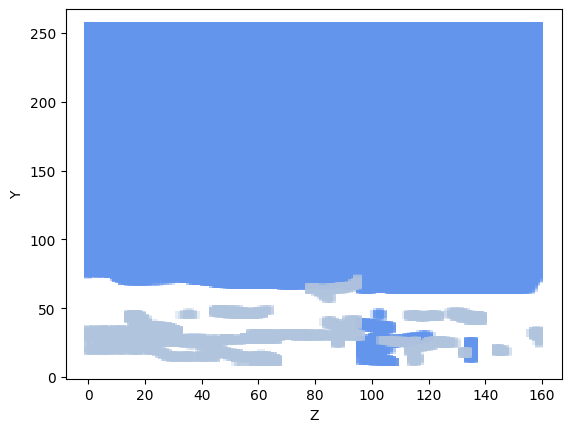

In [5]:
import matplotlib.pyplot as plt 
#Air block scatter plot
fig, ax = plt.subplots()
for lab in ["air", "cave_air"]:
    block = df[df.Tag == lab]
    x = block.X + block.CX*16 # coordenada absoluta
    y = block.Y 
    if lab == "air":
        color = "cornflowerblue"
    else:
        color = "lightsteelblue"
    ax.scatter(x, y, c=color, label=lab,
               alpha=0.3, edgecolors='none',marker="s")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


fig, ax = plt.subplots()
for lab in ["air", "cave_air"]:
    block = df[df.Tag == lab]
    z = block.Z + block.CZ*16 # coordenada absoluta
    y = block.Y 
    if lab == "air":
        color = "cornflowerblue"
    else:
        color = "lightsteelblue"
    ax.scatter(z, y, c=color, label=lab,
               alpha=0.3, edgecolors='none',marker="s")
plt.xlabel("Z")
plt.ylabel("Y")
plt.show()

- En estos gráficos podemos observar la distribución de los bloques de *aire* en azul y *aire de cueva* en color mas grisáceo. Se ve que a partir del la altura $Y = 70$ hay una gran cantidad de bloques de aire, estos corresponderían con el exterior, el cielo y el aire entre los arboles.

Como datos apartados podemos ver que hay bloques de *aire* debajo de la altura $Y = 70$. Estos bloques se encuentran en dentro de la grieta que se puede ver bajo tierra. También podemos ver que hay una porción de aire de cueva muy cercano a la superficie que corresponde con la entrada a alguna cueva desde la superficie.

### Distribución de la lava y el agua en el mapa

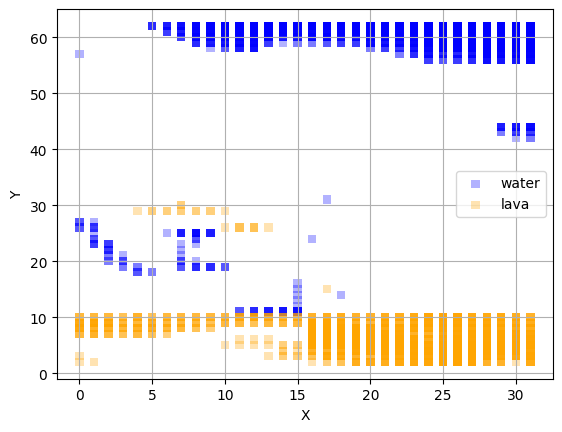

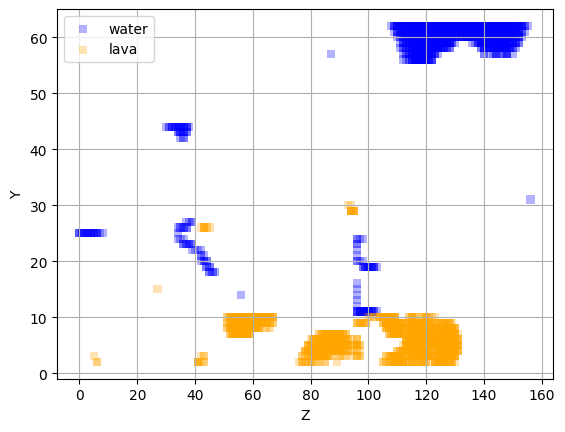

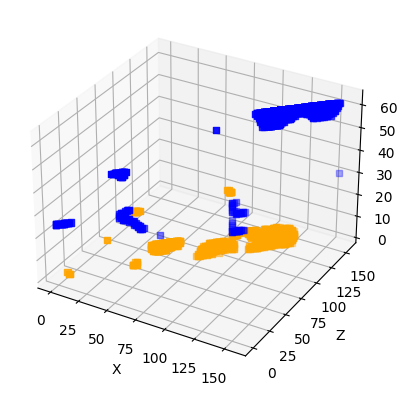

In [79]:
import numpy as np
import matplotlib.pyplot as plt
#lava and water scatter plot x and y
fig, ax = plt.subplots()
block = df
for lab in ["water", "lava"]:
    block = df[df.Tag == lab]
    x = block.X + block.CX*16 # coordenada absoluta
    y = block.Y 
    if lab == "water":
        color = "blue"
    else:
        color = "orange"
    ax.scatter(x, y, c=color, label=lab,
               alpha=0.3, edgecolors='none',marker="s")
ax.legend()
ax.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
#lava and water scatter plot z and y
fig, ax = plt.subplots()
block = df
for lab in ["water", "lava"]:
    block = df[df.Tag == lab]
    z = block.Z + block.CZ*16 # coordenada absoluta
    y = block.Y 
    if lab == "water":
        color = "blue"
    else:
        color = "orange"
    ax.scatter(z, y, c=color, label=lab,
               alpha=0.3, edgecolors='none',marker="s")
ax.legend()
ax.grid(True)
plt.xlabel("Z")
plt.ylabel("Y")
plt.show()
#lava and water scatter plot 3d
import matplotlib.pyplot as plt

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

for lab in ["water", "lava"]:
    block = df[df.Tag == lab]
    x = block.Z + block.CZ*16 # coordenada absoluta
    y = block.Y 
    z = block.Z + block.CZ*16 # coordenada absoluta
    if lab == "water":
        color = "blue"
    else:
        color = "orange"
    ax.scatter(x,z,y, c=color,marker="s")
plt.xlabel("X")
plt.ylabel("Z")    
plt.show()

- Se puede Interpretar de estos gráficos que hay más *lava* mientras mas profundo o hacia abajo se va en el mapa. También se puede apreciar que el agua en las cuevas o bajo tierra tiende a desplazarse hacia abajo, mientras que la *lava* se acumula en grandes cantidades siempre bajo tierra.
Como casos apartados podemos ve que hay un gran cúmulo de bloques de *agua* muy en la superficie que corresponde con el rio que se puede apreciar en las imágenes de arriba. También hay un gran cúmulo de *lava* que corresponde con el fondo de la grieta observada.

### Distribución de tierra y arboles en el mapa

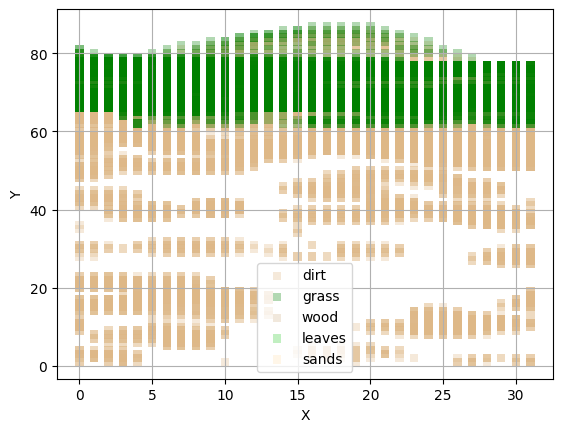

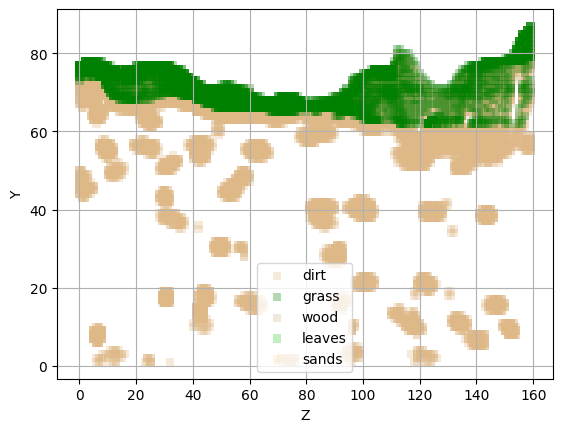

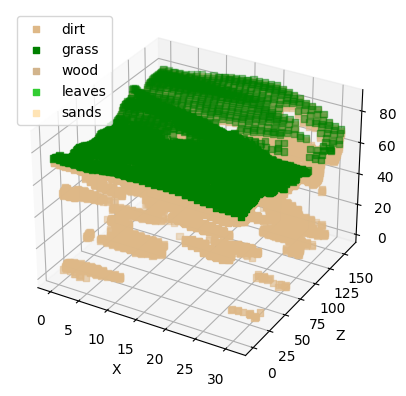

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#lava and water scatter plot x and y
#2D Plot
for dim in range(0,3):
    if(dim ==2):
        fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    else:
        fig, ax = plt.subplots()
    for lab in [['dirt'],['grass_block'],['oak_log','dark_oak_log','spruce_log'],['oak_leaves','dark_oak_leaves','spruce_leaves'],['sand','clay']]:
        block = df[df.Tag == lab[0]].copy()
        for i in range(1,len(lab)):
            block = block.merge(df[df.Tag == lab[i]],"outer")
        z = block.Z + block.CZ*16 # coordenada absoluta
        x = block.X + block.CX*16 # coordenada absoluta
        y = block.Y
        
        if lab[0] == "dirt":
            color = "burlywood"
            labName = "dirt"
        elif lab[0] == "grass_block":
            color = "green"
            labName = "grass"
        elif lab[0] == "oak_log":
            color = "tan"
            labName = "wood"
        elif lab[0] == "oak_leaves":
            color = "limegreen"
            labName = "leaves"
        elif lab[0] == "sand":
            color = "moccasin"
            labName = "sands"
        else:
            color = "white"
            labName = "None"
        if(dim == 0):
            ax.scatter(x, y, c=color, label=labName,alpha=0.3, edgecolors='none',marker="s")
            plt.xlabel("X")
            plt.ylabel("Y")
        elif(dim == 1):
            ax.scatter(z, y, c=color, label=labName,alpha=0.3, edgecolors='none',marker="s")
            plt.xlabel("Z")
            plt.ylabel("Y")
        elif(dim == 2):
            ax.scatter(x,z,y,label=labName, c=color,marker="s")
            plt.xlabel("X")
            plt.ylabel("Z")
    ax.grid(True)
    ax.legend()
    plt.show()

- En estos gráficos podemos ver la distribución de la tierra,los arboles con sus hojas,la arena y arcilla. Lo más destacable de estos gráficos es que se puede ver que los troncos y hojas de los arboles están separados del suelo y la piedra por dos capas, la primera capa consiste de los bloques con pasto, y la segunda de varios bloques de tierra. 

- También se puede ver que donde hay arena no existen arboles por encima y también esta separada de las piedras por una capa de tierra. Si observamos bien la parte del mapa sin arboles es el valle donde se encuentra el rio y toda la arena y grava se encuentra principalmente alrededor y debajo de el.

- Finalmente la tierra se distribuye en cúmulos entre la piedra y se extiende prácticamente hasta las capas mas profundas.

## Detección de Outliers o datos espaciales apartados

Un *dato espacial aparatado* es un objeto especialmente referenciado cuyos atributos no-espaciales tienen valores que difieren significativamente de aquellos otros objetos que son vecinos.  

Existen dos tipos de metodos para la detección *valores apartados* en datos espaciales:
- **Graphical test** (Prueba gráfica): Metodos de ejemplo incluye el *variogram cloud* y el *Moran scatterplots*.
- **Quantitative test** (Prueba cuantitativa): proveen una prueba precisa para la distinción de los datos apartados. los *Scatterplots* son representativos de esta técnica.

Un **variogram-cloud** muestra puntos de datos relacionados por una relación de vecindad. por cada par de localizaciones, se plotea la raíz cuadrada de la diferencia absoluta entre los valores de los atributos de las localizaciones contra la distancia Euclideana entre las localizaciones. En conjuntos de datos que exhiben una fuerte dependencia espacial, la varianza en la diferencia entre atributos incrementara a medida que incrementa la distancia entre localizaciones.
Localizaciones que están cercanas una de la otra, pero tienen gran diferencia en sus atributos, deberían indicar un dato apartado, incluso si los valores de ambas localizaciones puedan aparentar ser razonables cuando se examinan los datos no espaciales.


In [ ]:
from outlierDetection import outilerDetection as od
atts  = df.Tag.unique().tolist();
#Cuenta la cantidad de bloques en ventanas de 4x4x64
blocks = od.countBlocks(4,4,4,df,atts);
blocks.to_csv("..\\..\\Data\\blockCount.csv",sep=";");

C:\Users\MrtC101\AppData\Local\Temp\ipykernel_5728\1395380122.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


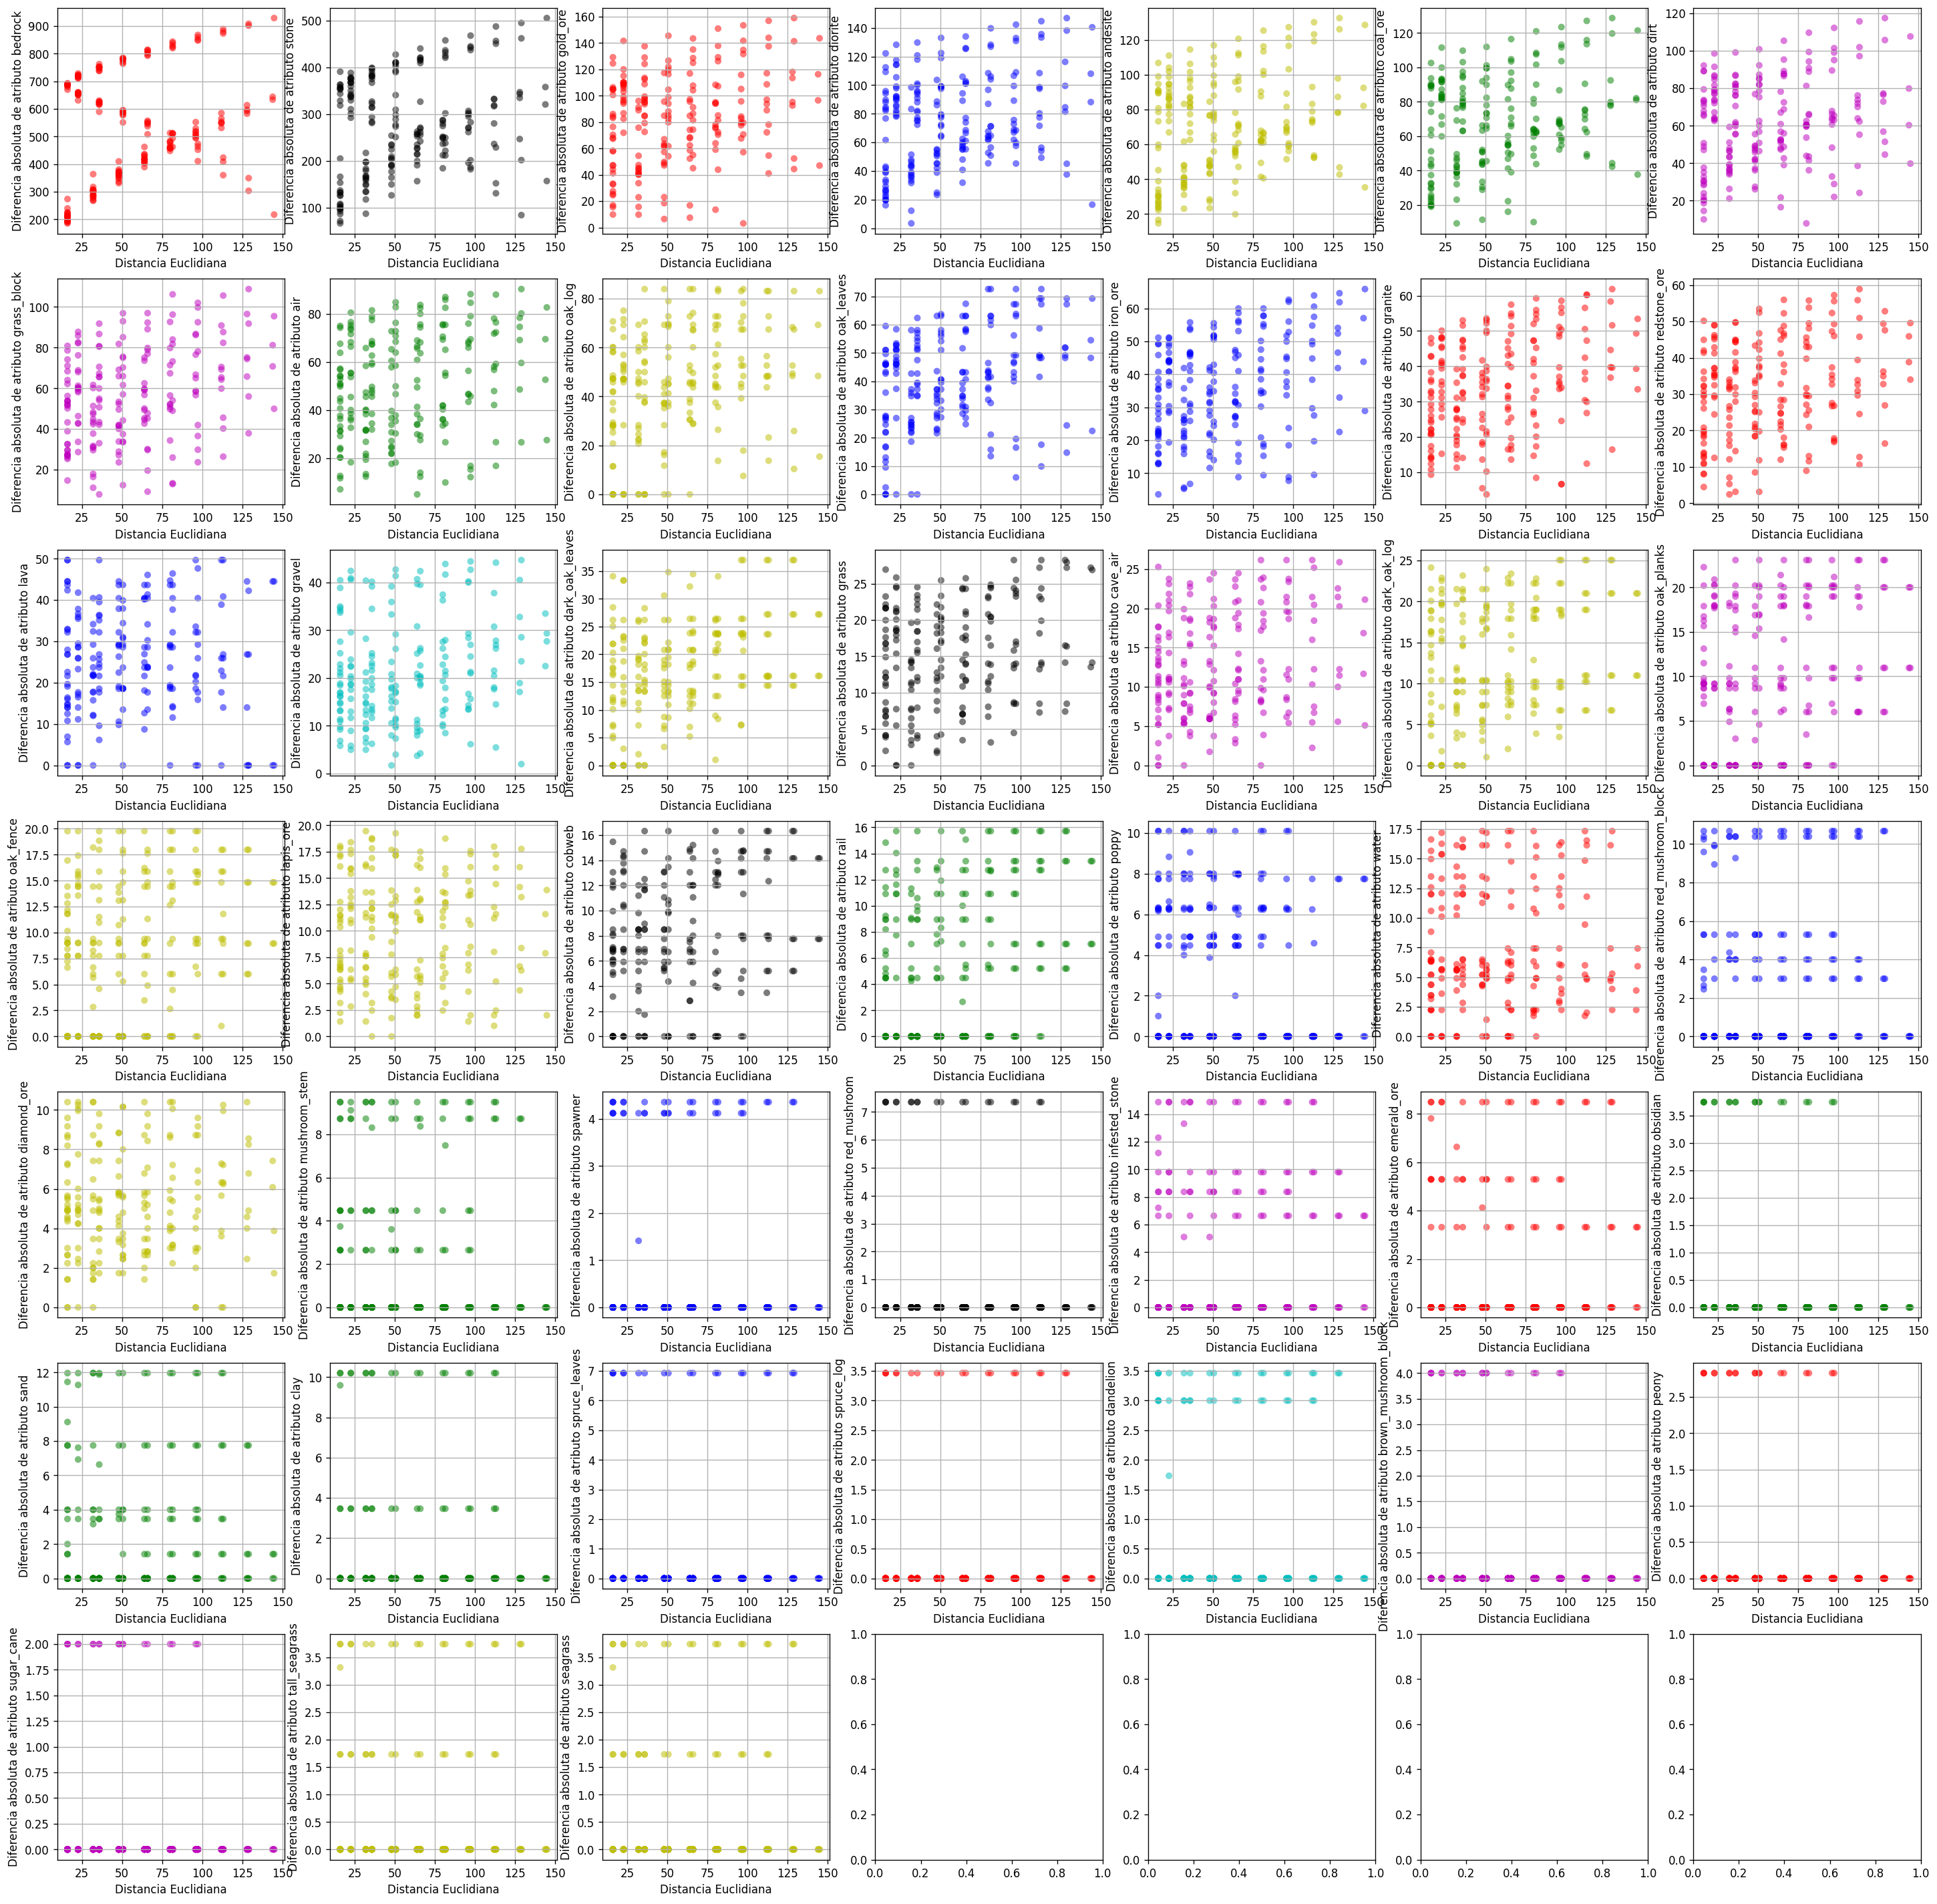

In [83]:
from outlierDetection import outilerDetection as od
import matplotlib.pyplot as plt
import pandas as pd
#Path del CSV
csvPath = "..\\..\\Data\\chunks.csv"
#Lectura del CSV
import pandas as pd
chunkdf = pd.read_csv(csvPath,delimiter=";",lineterminator="\n")
atts  = chunkdf.Tag.unique().tolist();
blocks = pd.read_csv("..\\..\\Data\\chunkBlockCount.csv",sep=";");
blocks = blocks.drop(blocks.columns[0],axis=1)

fig,ax = od.variogramCloud(blocks,atts);
fig.show()

- Debido a que los vecindarios, ventanas o en este caso *chunks* se encuentran de manera equidistante entre si, no es util utilizar métodos que sirven para la detección de datos apartados teniendo en cuenta el espacio. Debido a que las distancias entre dos bloques se tienden a repetir se puede ver que hay un patron en la distribución de los puntos en los gráficos. Pero no es claro donde existen datos apartados y donde no. 



## Generalización de el atributo tipo de bloque
Debido a que existen tipos de bloques que pueden generalizarse o abstraerse a un concepto mas general como por ejemplo oak_log y dark_oak_log que pueden agruparse en una categoría log. Realizar está abstracción nos dará reglas más generales, que serán mas fáciles de analizar.

En este caso agruparemos los tipos de bloques de esta manera:
- *igneous_rock* = {diorite,andesite,granite}
- *tree_log* = {oak_log,dark_oak_log,spruce_log}
- *tree_leaves* ={oak_leavesdark_oak_leaves,spruce_leaves}
- flower = {poppy,dandelion,peony}
- *seagrass* = {tall_seagrass,seagrass}
- *sedimentary_stone* = {sand,clay,gravel}
- *mushroom_block* ={red_mushroom_block,brown_mushroom_block,mushroom_stem}
- *planks_block* = {oak_planks}
- *fence* = {oak_fence}

In [87]:
import pandas as pd
from preprocess import Preprocess as pss
csvPath = "..\\..\\Data\\chunks.csv"
chunk = pd.read_csv(csvPath,delimiter=";",lineterminator="\n")
chunk = chunk.rename(columns={"ChunkZ\r": "ChunkZ"}, errors="raise")
print(chunk.Tag.unique().tolist());

print("new types")
df = pss.generalizeBlockTypes(chunk);
print(df.Tag.unique().tolist());
df.to_csv("..\\..\\Data\\generalizedChunk.csv",sep=";");

['bedrock', 'stone', 'gold_ore', 'diorite', 'andesite', 'coal_ore', 'dirt', 'grass_block', 'air', 'oak_log', 'oak_leaves', 'iron_ore', 'granite', 'redstone_ore', 'lava', 'gravel', 'dark_oak_leaves', 'grass', 'cave_air', 'dark_oak_log', 'oak_planks', 'oak_fence', 'lapis_ore', 'cobweb', 'rail', 'poppy', 'water', 'red_mushroom_block', 'diamond_ore', 'mushroom_stem', 'spawner', 'red_mushroom', 'infested_stone', 'emerald_ore', 'obsidian', 'sand', 'clay', 'spruce_leaves', 'spruce_log', 'dandelion', 'brown_mushroom_block', 'peony', 'sugar_cane', 'tall_seagrass', 'seagrass']
new types
['bedrock', 'stone', 'gold_ore', 'igneous_rock', 'coal_ore', 'dirt', 'grass_block', 'air', 'tree_log', 'tree_leaves', 'iron_ore', 'redstone_ore', 'lava', 'sedimentary_stone', 'grass', 'cave_air', 'planks_block', 'fence', 'lapis_ore', 'cobweb', 'rail', 'flower', 'water', 'mushroom_block', 'diamond_ore', 'spawner', 'red_mushroom', 'infested_stone', 'emerald_ore', 'obsidian', 'sugar_cane', 'seagrass']


In [84]:
#cargar el df
csvPath = "..\\..\\Data\\generalizedChunk.csv"
df = pd.read_csv(csvPath,delimiter=";",lineterminator="\n")
df = df.rename(columns={"ChunkX": "CX","ChunkZ\r": "CZ"}, errors="raise")
df = df.drop(df.columns[0],axis=1);
print(df)


           Bid   X    Y   Z      Tag  CX  CZ
0            1   0    0   0  bedrock   0   0
1            2   0    1   0  bedrock   0   0
2            3   0    2   0  bedrock   0   0
3            4   0    3   0    stone   0   0
4            5   0    4   0    stone   0   0
...        ...  ..  ...  ..      ...  ..  ..
1310715  65532  15  251  15      air   1   9
1310716  65533  15  252  15      air   1   9
1310717  65534  15  253  15      air   1   9
1310718  65535  15  254  15      air   1   9
1310719  65536  15  255  15      air   1   9

[1310720 rows x 7 columns]


air                  937528
stone                253468
igneous_rock          44730
dirt                  19154
bedrock               15343
tree_leaves            8834
cave_air               7669
coal_ore               4396
sedimentary_stone      4375
grass_block            4107
tree_log               2697
iron_ore               2329
water                  1963
lava                   1727
redstone_ore            538
mushroom_block          253
gold_ore                250
grass                   247
planks_block            226
fence                   188
infested_stone          158
cobweb                  113
rail                     96
lapis_ore                88
diamond_ore              75
seagrass                 74
flower                   42
obsidian                 27
emerald_ore              18
red_mushroom              3
spawner                   2
sugar_cane                2
Name: Tag, dtype: int64


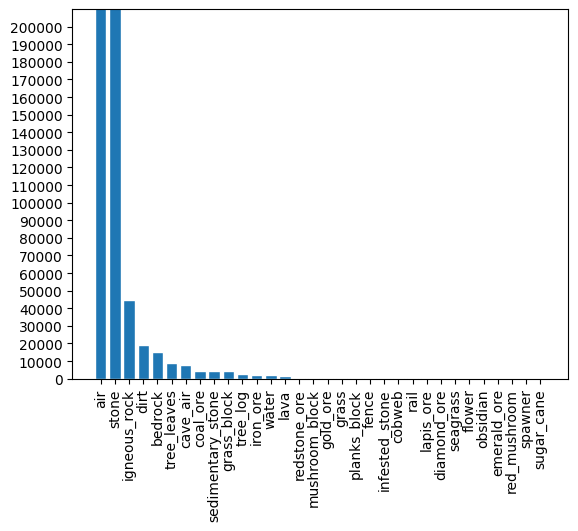

In [85]:
import matplotlib.pyplot as plt 
import numpy as np
# make data:
x = df["Tag"].value_counts().axes[0]
y = df["Tag"].value_counts()
print(y)
# plot
fig, ax = plt.subplots()

ax.bar(x, y, width=0.8, edgecolor="white")

ax.set(xticks=np.arange(0, len(x)),
       ylim=(0, 210000), yticks=np.arange(0, 210000,10000))

plt.xticks(rotation=90)
plt.show()

## Creación de transacciones a partir de datos espaciales
### Window centric model: Transacciones de ventanas de 4x4x4 sin solapamiento

In [4]:
#preprocesamiento Windows metric model
from preprocess import Preprocess
#TAMAÑO DE VENTANAS 4x4x4 bloques
atts  = df.Tag.unique().tolist();
transactions : pd.DataFrame = Preprocess.windowModel(4,4,64,atts,df,False,False);
print(transactions)
transactions.to_csv("..\\..\\Data\\transactions4x4x4.csv",sep=";");#9m

KeyboardInterrupt: 

In [92]:
# Parámetros
import pandas as pd
import apriori as ap
transactions = pd.read_csv("..\\..\\Data\\transactions4x4x4.csv",sep=";");
transactions = transactions.drop(transactions.columns[0],axis=1);
print("maximo valor para soporte minimo = "+ str(round(max(ap.getSupports(transactions)),5)));
print("minimo valor para soporte minimo = "+ str(round(min(ap.getSupports(transactions)),5)))

maximo valor para soporte minimo = 0.74448
minimo valor para soporte minimo = 0.0001


In [118]:
# correr Apriori
import pandas as pd
import apriori as ap
import math
transactions = pd.read_csv("..\\..\\Data\\transactions4x4x4.csv",sep=";");
transactions = transactions.drop(transactions.columns[0],axis=1);
minSup = 100/len(transactions);
print("Min:"+str(minSup))
rules=ap.apriori(transactions,minSup,0.9);
rules.to_csv("..\\..\\Data\\windowRules"+str(round(minSup,3))+"x90.csv",sep=";");

Min:0.00244140625
cantidad:79 ;
cantidad:82 ;
cantidad:23 ;
cantidad:2 ;
cantidad:0 ;


In [119]:
#Graficar
import pandas as pd
import postprocess as pp
rules = pd.read_csv("..\\..\\Data\\windowRules002x90.csv",sep=";");
rules = rules.drop(rules.columns[0],axis=1);
#reglas
print(rules)
pp.toNeo("windowRules001x90");

                                         antecedants  =>      consequents  \
0                                       ['coal_ore']  =>        ['stone']   
1                                      ['lapis_ore']  =>        ['stone']   
2                                 ['mushroom_block']  =>          ['air']   
3                                           ['lava']  =>        ['stone']   
4                                 ['infested_stone']  =>        ['stone']   
..                                               ...  ..              ...   
126           ['cave_air', 'igneous_rock', 'cobweb']  =>        ['stone']   
127  ['grass', 'grass_block', 'dirt', 'tree_leaves']  =>          ['air']   
128          ['grass', 'air', 'dirt', 'tree_leaves']  =>  ['grass_block']   
129     ['grass', 'grass_block', 'dirt', 'tree_log']  =>          ['air']   
130             ['grass', 'air', 'dirt', 'tree_log']  =>  ['grass_block']   

      support  confidence       lift  frequency  Xfrequency  Yfrequency  
0

In [104]:
#Posprocesamiento
import pandas as pd
import postprocess as pp
rules = pd.read_csv("..\\..\\Data\\windowRules005x90.csv",sep=";");
rules = rules.drop(rules.columns[0],axis=1);
DS : pd.DataFrame;
Non_DS : pd.DataFrame;
DS, Non_DS  = pp.pruneRules(rules,s=0.05);
DS.to_csv("..\\..\\Data\\windowRules(DS).csv",sep=";");
Non_DS.to_csv("..\\..\\Data\\windowRules(non_DS).csv",sep=";");

In [169]:
rules = pd.read_csv("..\\..\\Data\\windowRules(DS).csv",sep=";");
rules = rules.drop(rules.columns[0],axis=1);
print(rules)

              antecedants      =>      consequents   support  confidence  \
0            ['coal_ore']  ['=>']        ['stone']  0.050830    1.000000   
1                ['lava']  ['=>']        ['stone']  0.006641    1.000000   
2         ['tree_leaves']  ['=>']          ['air']  0.028857    1.000000   
3               ['grass']  ['=>']  ['grass_block']  0.008057    0.906593   
4         ['grass_block']  ['=>']         ['dirt']  0.024414    0.902527   
5            ['iron_ore']  ['=>']        ['stone']  0.054346    1.000000   
6   ['sedimentary_stone']  ['=>']        ['stone']  0.025244    0.966355   
7            ['tree_log']  ['=>']          ['air']  0.023584    0.997934   
8            ['cave_air']  ['=>']        ['stone']  0.029443    0.982085   
9         ['grass_block']  ['=>']          ['air']  0.024951    0.922383   
10       ['planks_block']  ['=>']        ['stone']  0.007275    1.000000   
11           ['gold_ore']  ['=>']        ['stone']  0.006006    1.000000   
12          

In [106]:
pp.toNeo("windowRules(DS)");

In [107]:
pp.toNeo("windowRules(non_DS)");

#### Análisis de las reglas obtenidas

Para la generación de estas reglas pasamos como parámetro un soporte mínimo de 0.00001 y una confianza de 90%. Utilizamos estos parámetros debido a que el conjunto de bloques del juego se encuentra desbalanciado (la cantidad de bloques de aire,piedra y tierra tienen frecuencias altas comparado a los demás bloques) si no colocásemos un soporte mas pequeño que 0 las reglas generadas no mostrarían las relaciones que existen entre aquellos bloque que menos hay en el mapa, y debido a el enfoque de nuestro problema lo que buscamos es encontrar la mayor cantidad de relaciones entre los objetos del mapa posible.Y utilizamos una confianza alta ya que al tratarse de una generación aleatoria no todos las relaciones que existen se repetirán lo suficiente como para que sean patrones validos.

Realmente este enfoque para modelar las transacciones no nos resulta de gran interés, ya que simplemente nos muestra que bloque existe en una ventada dado que otro existe en ella. Si bien es notorio que existe un patron, no podemos saber claramente como es el patrón claramente. 
Entonces el **windows centric model** no es un modelo que nos permita obtener las reglas que se buscan.

#### Grafo de reglas reglas de asociación:

![Grafo de reglas obtenidas](../../Images/Graphs/windowsRulesGeneralGraph.png)  

Podemos observar que se trata de un grafo totalmente conexo, tiene (577 nodos) y representa (869 reglas), donde cada nodo representa un antecedente o consecuente de una regla. Al tratarse de un grafo muy grande y cantidad de reglas es grande. Resulta muy difícil analizarlo. Simplemente podemos marcar algunos pequeños clusters que se forman alrededor de nodos particulares, los cuales se puede apreciar que siempre tienen un solo tipo de bloque, ej. air,dirt, water o stone.

![Grafo de las DS rules](../../Images/Graphs/windowsDSGraph.png)  

Este grafo es el resultado del post-procesamiento y se trata de las reglas que forman el direction setting set o DS. Estas son las reglas que representan y dan dirección a la mayoría de las demás reglas que se encuentran en non-DS rules. El análisis resulta sencillo en este grafo.
Podemos ver entonces los siguientes patrones:

- Si hay pasto o flores entonces también hay bloques de tierra con pasto.
- Si hay bloque de tierra con pasto o troncos u hojas entonces también hay aire. 

![Grafo de las non-DS](../../Images/Graphs/windowsnonDSGraph.png) 



### Reference feature centric model

Transacciones con ventanas de la forma cruz con 7 bloques, se pueden visualizar de la siguiente manera:  
![Cruz](../../Images/Croos.png)  
Con este tipo de modelado de transacciones podemos obtener reglas que tienen una forma más cercana a las reglas que esperamos generar.

### Atributo de referencia **diamante**

In [23]:
#Generar transacciones
from preprocess import Preprocess
atts  = df.Tag.unique().tolist();
list = ['diamond_ore']
transactions : pd.DataFrame = Preprocess.referenceFeatureModel(atts,df,list,"");
transactions.to_csv("..\\..\\Data\\transactionsDiamond.csv",sep=";");

0/75|21:28:43|0:0:0
1/75|21:28:44|0:0:0
2/75|21:28:44|0:0:0
3/75|21:28:44|0:0:0
4/75|21:28:44|0:0:0
5/75|21:28:44|0:0:1
6/75|21:28:44|0:0:1
7/75|21:28:45|0:0:1
8/75|21:28:45|0:0:1
9/75|21:28:45|0:0:1
10/75|21:28:45|0:0:1
11/75|21:28:45|0:0:2
12/75|21:28:45|0:0:2
13/75|21:28:46|0:0:2
14/75|21:28:46|0:0:2
15/75|21:28:46|0:0:2
16/75|21:28:46|0:0:2
17/75|21:28:46|0:0:2
18/75|21:28:46|0:0:3
19/75|21:28:46|0:0:3
20/75|21:28:46|0:0:3
21/75|21:28:47|0:0:3
22/75|21:28:47|0:0:3
23/75|21:28:47|0:0:3
24/75|21:28:47|0:0:3
25/75|21:28:47|0:0:3
26/75|21:28:47|0:0:4
27/75|21:28:47|0:0:4
28/75|21:28:47|0:0:4
29/75|21:28:48|0:0:4
30/75|21:28:48|0:0:4
31/75|21:28:48|0:0:4
32/75|21:28:48|0:0:4
33/75|21:28:48|0:0:4
34/75|21:28:48|0:0:5
35/75|21:28:48|0:0:5
36/75|21:28:49|0:0:5
37/75|21:28:49|0:0:5
38/75|21:28:49|0:0:5
39/75|21:28:49|0:0:5
40/75|21:28:49|0:0:5
41/75|21:28:49|0:0:5
42/75|21:28:49|0:0:6
43/75|21:28:49|0:0:6
44/75|21:28:49|0:0:6
45/75|21:28:50|0:0:6
46/75|21:28:50|0:0:6
47/75|21:28:50|0:0:6
48

In [130]:
# Parámetros
import pandas as pd
import apriori as ap
transactions = pd.read_csv("..\\..\\Data\\transactionsDiamond.csv",sep=";");
transactions = transactions.drop(transactions.columns[0],axis=1);
print("maximo valor para soporte minimo = "+ str(round(max(ap.getSupports(transactions)),5)));
print("minimo valor para soporte minimo = "+ str(round(min(ap.getSupports(transactions)),5)))

maximo valor para soporte minimo = 1.0
minimo valor para soporte minimo = 0.0


In [139]:
#Apriori
import pandas as pd
import apriori as ap
transactions = pd.read_csv("..\\..\\Data\\transactionsDiamond.csv",sep=";");
transactions = transactions.drop(transactions.columns[0],axis=1);
minSup = 12/len(transactions);
print(minSup)
rules = ap.apriori(transactions,minSup,0.75);
rules.to_csv("..\\..\\Data\\rulesDiamond"+str(round(minSup,3))+"x75.csv",sep=";");

0.16
cantidad:40 ;
cantidad:36 ;
cantidad:8 ;
cantidad:0 ;


In [140]:
#Graficar
import pandas as pd
import postprocess as pp
rules = pd.read_csv("..\\..\\Data\\rulesDiamond16x75.csv",sep=";");
rules = rules.drop(rules.columns[0],axis=1);
#reglas
print(rules)
pp.toNeo("rulesDiamond16x75");

                                          antecedants  =>  \
0                       ['delante tiene diamond_ore']  =>   
1                                 ['abajo hay stone']  =>   
2                                ['arriba hay stone']  =>   
3                        ['detrás tiene diamond_ore']  =>   
4                          ['arriba hay diamond_ore']  =>   
..                                                ...  ..   
65  ['abajo hay stone', 'es diamond_ore', 'esta a ...  =>   
66  ['abajo hay stone', 'esta a la derecha de ston...  =>   
67  ['delante tiene stone', 'es diamond_ore', 'det...  =>   
68  ['abajo hay stone', 'es diamond_ore', 'detrás ...  =>   
69  ['abajo hay stone', 'delante tiene stone', 'de...  =>   

                       consequents   support  confidence      lift  frequency  \
0               ['es diamond_ore']  0.320000    1.000000  1.000000         24   
1               ['es diamond_ore']  0.533333    1.000000  1.000000         40   
2               ['es dia

In [170]:
rules = pd.read_csv("..\\..\\Data\\diamondRules(DS).csv",sep=";");
rules = rules.drop(rules.columns[0],axis=1);
print(rules)

                              antecedants      =>  \
0            ['detrás tiene diamond_ore']  ['=>']   
1               ['abajo hay diamond_ore']  ['=>']   
2  ['esta a la izquierda de diamond_ore']  ['=>']   
3           ['delante tiene diamond_ore']  ['=>']   

                      consequents   support  confidence      lift  frequency  \
0         ['delante tiene stone']  0.253333    0.791667  1.696429         19   
1            ['arriba hay stone']  0.186667    0.823529  1.470588         14   
2  ['esta a la derecha de stone']  0.240000    0.857143  1.648352         18   
3          ['detrás tiene stone']  0.253333    0.791667  1.562500         19   

   Xfrequency  Yfrequency  dir pruned                           justify  
0          24          35    1   None  positive correlated 1-level rule  
1          17          42    1   None  positive correlated 1-level rule  
2          21          39    1   None  positive correlated 1-level rule  
3          24          38    1   None

In [1]:
#Posprocesamiento
import pandas as pd
import postprocess as pp
rules = pd.read_csv("..\\..\\Data\\rulesDiamond16x75.csv",sep=";");
rules = rules.drop(rules.columns[0],axis=1);
DS : pd.DataFrame;
Non_DS : pd.DataFrame;
DS, Non_DS  = pp.pruneRules(rules,s=0.05);
DS.to_csv("..\\..\\Data\\diamondRules(DS).csv",sep=";");
Non_DS.to_csv("..\\..\\Data\\diamondRules(non_DS).csv",sep=";");

In [142]:
pp.toNeo("diamondRules(DS)");

In [143]:
pp.toNeo("diamondRules(non_DS)");

### Análisis de las Reglas
En este caso con el debido análisis se pueden detectar ciertos patrones al rededor de los bloques de diamante.

#### Grafo de reglas reglas de asociación:

![Grafo de reglas obtenidas](../../Images/Graphs/diamonRulesGeneralGraph.png)  

Podemos observar que se trata de un grafo totalmente conexo, tiene (577 nodos) y representa (869 reglas), donde cada nodo representa un antecedente o consecuente de una regla. Al tratarse de un grafo muy grande y cantidad de reglas es grande. Resulta muy difícil analizarlo. Simplemente podemos marcar algunos pequeños clusters que se forman alrededor de nodos particulares, los cuales se puede apreciar que siempre tienen un solo tipo de bloque, ej. air,dirt, water o stone.

![Grafo de las DS rules](../../Images/Graphs/diamondDSGraph.png)  

Este grafo es el resultado del post-procesamiento y se trata de las reglas que forman el direction setting set o DS. Estas son las reglas que representan y dan dirección a la mayoría de las demás reglas que se encuentran en non-DS rules. El análisis resulta sencillo en este grafo.
Podemos ver entonces los siguientes patrones:

- Si hay pasto o flores entonces también hay bloques de tierra con pasto.
- Si hay bloque de tierra con pasto o troncos u hojas entonces también hay aire. 

![Grafo de las non-DS](../../Images/Graphs/diamondnonDSGraph.png) 

#### Análisis de las reglas obtenidas

Para la generación de estas reglas pasamos como parámetro un soporte mínimo de 0.00001 y una confianza de 90%. Utilizamos estos parámetros debido a que el conjunto de bloques del juego se encuentra desbalanciado (la cantidad de bloques de aire,piedra y tierra tienen frecuencias altas comparado a los demás bloques) si no colocásemos un soporte mas pequeño que 0 las reglas generadas no mostrarían las relaciones que existen entre aquellos bloque que menos hay en el mapa, y debido a el enfoque de nuestro problema lo que buscamos es encontrar la mayor cantidad de relaciones entre los objetos del mapa posible.Y utilizamos una confianza alta ya que al tratarse de una generación aleatoria no todos las relaciones que existen se repetirán lo suficiente como para que sean patrones validos.

Realmente este enfoque para modelar las transacciones no nos resulta de gran interés, ya que simplemente nos muestra que bloque existe en una ventada dado que otro existe en ella. Si bien es notorio que existe un patron, no podemos saber claramente como es el patrón claramente. 
Entonces el **windows centric model** no es un modelo que nos permita obtener las reglas que se buscan.

## Atributo de referencia **hojas y troncos**

In [36]:
from preprocess import Preprocess
atts  = df.Tag.unique().tolist();
#intratable Arboles y hojas
trees = ['tree_log', 'tree_leaves'];
transactions : pd.DataFrame = Preprocess.referenceFeatureModel(atts,df,trees,"");
print(transactions)
transactions.to_csv("..\\..\\Data\\transactionsTrees.csv",sep=";");

0/11531|22:9:19|0:0:0
58/11531|22:9:28|0:0:9
116/11531|22:9:36|0:0:16
174/11531|22:9:43|0:0:24
232/11531|22:9:51|0:0:32
290/11531|22:10:0|0:0:40
348/11531|22:10:8|0:0:48
406/11531|22:10:15|0:0:56
464/11531|22:10:23|0:1:4
522/11531|22:10:31|0:1:12
580/11531|22:10:39|0:1:19
638/11531|22:10:46|0:1:27
696/11531|22:10:54|0:1:34
754/11531|22:11:1|0:1:42
812/11531|22:11:8|0:1:49
870/11531|22:11:16|0:1:57
928/11531|22:11:24|0:2:4
986/11531|22:11:31|0:2:12
1044/11531|22:11:38|0:2:19
1102/11531|22:11:46|0:2:26
1160/11531|22:11:53|0:2:34
1218/11531|22:12:1|0:2:41
1276/11531|22:12:8|0:2:49
1334/11531|22:12:15|0:2:56
1392/11531|22:12:23|0:3:3
1450/11531|22:12:30|0:3:11
1508/11531|22:12:37|0:3:18
1566/11531|22:12:45|0:3:25
1624/11531|22:12:52|0:3:33
1682/11531|22:13:0|0:3:41
1740/11531|22:13:8|0:3:49
1798/11531|22:13:15|0:3:56
1856/11531|22:13:23|0:4:4
1914/11531|22:13:30|0:4:11
1972/11531|22:13:37|0:4:18
2030/11531|22:13:45|0:4:25
2088/11531|22:13:52|0:4:33
2146/11531|22:14:0|0:4:41
2204/11531|22:1

In [44]:
# Parámetros
import pandas as pd
import apriori as ap
transactions = pd.read_csv("..\\..\\Data\\transactionsTrees.csv",sep=";");
transactions = transactions.drop(transactions.columns[0],axis=1);
s : pd.Series = ap.getSupports(transactions);
print("maximo valor para soporte minimo = "+ str(round(max(s[s>0]),5)));
print("minimo valor para soporte minimo = "+ str(round(min(s[s>0]),4)));

maximo valor para soporte minimo = 0.76611
minimo valor para soporte minimo = 0.0001


In [147]:
#Apriori
import pandas as pd
import apriori as ap
transactions = pd.read_csv("..\\..\\Data\\transactionsTrees.csv",sep=";");
transactions = transactions.drop(transactions.columns[0],axis=1);
minSup = 200/len(transactions);
print(minSup)
rules = ap.apriori(transactions,minSup,0.9);
rules.to_csv("..\\..\\Data\\rulesTrees"+str(round(minSup,3))+"x90.csv",sep=";");

0.01734454947532738
cantidad:164 ;
cantidad:330 ;
cantidad:206 ;
cantidad:30 ;
cantidad:2 ;
cantidad:0 ;


In [148]:
#Graficar
import pandas as pd
import postprocess as pp
rules = pd.read_csv("..\\..\\Data\\rulesTrees17x90.csv",sep=";");
rules = rules.drop(rules.columns[0],axis=1);
#reglas
print(rules)
pp.toNeo("rulesTrees17x90");

                                           antecedants  =>  \
0                           ['arriba hay tree_leaves']  =>   
1                                   ['abajo hay dirt']  =>   
2                        ['delante tiene tree_leaves']  =>   
3                 ['esta a la derecha de tree_leaves']  =>   
4                         ['detrás tiene tree_leaves']  =>   
..                                                 ...  ..   
260  ['abajo hay tree_leaves', 'esta a la izquierda...  =>   
261  ['abajo hay tree_log', 'esta a la derecha de t...  =>   
262  ['abajo hay tree_log', 'es tree_log', 'esta a ...  =>   
263  ['detrás tiene tree_leaves', 'esta a la izquie...  =>   
264  ['abajo hay tree_leaves', 'detrás tiene tree_l...  =>   

                 consequents   support  confidence      lift  frequency  \
0         ['es tree_leaves']  0.455034    0.905123  1.181455       5247   
1            ['es tree_log']  0.023935    1.000000  4.275491        276   
2         ['es tree_leaves']  

In [149]:
#Posprocesamiento
import pandas as pd
import postprocess as pp
rules = pd.read_csv("..\\..\\Data\\rulesTrees17x90.csv",sep=";");
rules = rules.drop(rules.columns[0],axis=1);
DS : pd.DataFrame;
Non_DS : pd.DataFrame;
DS, Non_DS  = pp.pruneRules(rules,s=0.05);
DS.to_csv("..\\..\\Data\\treesRules(DS).csv",sep=";");
Non_DS.to_csv("..\\..\\Data\\treesRules(non_DS).csv",sep=";");

In [171]:
rules = pd.read_csv("..\\..\\Data\\treesRules(DS).csv",sep=";");
rules = rules.drop(rules.columns[0],axis=1);
print(rules)

                               antecedants      =>              consequents  \
0               ['arriba hay tree_leaves']  ['=>']       ['es tree_leaves']   
1                       ['abajo hay dirt']  ['=>']          ['es tree_log']   
2            ['delante tiene tree_leaves']  ['=>']       ['es tree_leaves']   
3     ['esta a la derecha de tree_leaves']  ['=>']       ['es tree_leaves']   
4             ['detrás tiene tree_leaves']  ['=>']       ['es tree_leaves']   
5                  ['arriba hay tree_log']  ['=>']          ['es tree_log']   
6   ['esta a la izquierda de tree_leaves']  ['=>']       ['es tree_leaves']   
7                        ['abajo hay air']  ['=>']       ['es tree_leaves']   
8                       ['abajo hay dirt']  ['=>']  ['arriba hay tree_log']   
9                ['abajo hay tree_leaves']  ['=>']       ['es tree_leaves']   
10                      ['arriba hay air']  ['=>']       ['es tree_leaves']   

     support  confidence      lift  frequency  Xfre

In [150]:
pp.toNeo("treesRules(DS)");

In [151]:
pp.toNeo("treesRules(non_DS)");

### Análisis de las Reglas
En este caso con el debido análisis se pueden detectar ciertos patrones al rededor de los bloques de diamante.

#### Grafo de reglas reglas de asociación:

![Grafo de reglas obtenidas](../../Images/Graphs/treesGeneralGraph.png)  

Podemos observar que se trata de un grafo totalmente conexo, tiene (577 nodos) y representa (869 reglas), donde cada nodo representa un antecedente o consecuente de una regla. Al tratarse de un grafo muy grande y cantidad de reglas es grande. Resulta muy difícil analizarlo. Simplemente podemos marcar algunos pequeños clusters que se forman alrededor de nodos particulares, los cuales se puede apreciar que siempre tienen un solo tipo de bloque, ej. air,dirt, water o stone.

![Grafo de las DS rules](../../Images/Graphs/treesDSGraph.png)  

Este grafo es el resultado del post-procesamiento y se trata de las reglas que forman el direction setting set o DS. Estas son las reglas que representan y dan dirección a la mayoría de las demás reglas que se encuentran en non-DS rules. El análisis resulta sencillo en este grafo.
Podemos ver entonces los siguientes patrones:

- Si hay pasto o flores entonces también hay bloques de tierra con pasto.
- Si hay bloque de tierra con pasto o troncos u hojas entonces también hay aire. 

![Grafo de las non-DS](../../Images/Graphs/treesnonDSGraph.png) 

## Atributo de referencia **bloque con pasto**

In [53]:
from preprocess import Preprocess
atts  = df.Tag.unique().tolist();
#intratable Arboles y hojas
print(atts)
trees = ['grass_block'];
transactions : pd.DataFrame = Preprocess.referenceFeatureModel(atts,df,trees,"");
print(transactions)
transactions.to_csv("..\\..\\Data\\transactionsGrass.csv",sep=";");

['bedrock', 'stone', 'gold_ore', 'igneous_rock', 'coal_ore', 'dirt', 'grass_block', 'air', 'tree_log', 'tree_leaves', 'iron_ore', 'redstone_ore', 'lava', 'sedimentary_stone', 'grass', 'cave_air', 'planks_block', 'fence', 'lapis_ore', 'cobweb', 'rail', 'flower', 'water', 'mushroom_block', 'diamond_ore', 'spawner', 'red_mushroom', 'infested_stone', 'emerald_ore', 'obsidian', 'sugar_cane', 'seagrass']
0/4107|23:10:57|0:0:0
21/4107|23:11:0|0:0:3
42/4107|23:11:3|0:0:5
63/4107|23:11:5|0:0:8
84/4107|23:11:8|0:0:10
105/4107|23:11:10|0:0:13
126/4107|23:11:12|0:0:15
147/4107|23:11:14|0:0:17
168/4107|23:11:16|0:0:19
189/4107|23:11:19|0:0:21
210/4107|23:11:21|0:0:23
231/4107|23:11:23|0:0:26
252/4107|23:11:25|0:0:28
273/4107|23:11:27|0:0:30
294/4107|23:11:30|0:0:32
315/4107|23:11:32|0:0:34
336/4107|23:11:34|0:0:36
357/4107|23:11:36|0:0:39
378/4107|23:11:38|0:0:41
399/4107|23:11:41|0:0:43
420/4107|23:11:43|0:0:45
441/4107|23:11:45|0:0:47
462/4107|23:11:47|0:0:49
483/4107|23:11:49|0:0:51
504/4107|23:

In [54]:
import pandas as pd
import apriori as ap
transactions = pd.read_csv("..\\..\\Data\\transactionsGrass.csv",sep=";");
transactions = transactions.drop(transactions.columns[0],axis=1);
s : pd.Series = ap.getSupports(transactions);
print("maximo valor para soporte minimo = "+ str(round(max(s[s>0]),5)));
print("minimo valor para soporte minimo = "+ str(round(min(s[s>0]),5)));

maximo valor para soporte minimo = 1.0
minimo valor para soporte minimo = 0.00024


In [152]:
import pandas as pd
import apriori as ap
transactions = pd.read_csv("..\\..\\Data\\transactionsGrass.csv",sep=";");
transactions = transactions.drop(transactions.columns[0],axis=1);
minSup = 200/len(transactions);
print(minSup)
rules = ap.apriori(transactions,minSup,0.9);
rules.to_csv("..\\..\\Data\\rulesGrass"+str(round(minSup,3))+"x90.csv",sep=";");

0.048697345994643294
cantidad:75 ;
cantidad:101 ;
cantidad:41 ;
cantidad:2 ;
cantidad:0 ;


In [154]:
#Graficar
import pandas as pd
import postprocess as pp
rules = pd.read_csv("..\\..\\Data\\rulesGrass49x90.csv",sep=";");
rules = rules.drop(rules.columns[0],axis=1);
#reglas
print(rules)
pp.toNeo("rulesGrass49x90");

                                           antecedants  =>  \
0                                ['delante tiene air']  =>   
1                                   ['abajo hay dirt']  =>   
2                                   ['es grass_block']  =>   
3                         ['esta a la derecha de air']  =>   
4                         ['esta a la derecha de air']  =>   
..                                                 ...  ..   
200  ['esta a la derecha de air', 'es grass_block',...  =>   
201  ['esta a la izquierda de dirt', 'detrás tiene ...  =>   
202  ['esta a la izquierda de dirt', 'detrás tiene ...  =>   
203  ['esta a la izquierda de dirt', 'esta a la der...  =>   
204  ['esta a la izquierda de dirt', 'esta a la der...  =>   

            consequents   support  confidence      lift  frequency  \
0    ['es grass_block']  0.154614    1.000000  1.000000        635   
1    ['es grass_block']  0.988556    1.000000  1.000000       4060   
2    ['abajo hay dirt']  0.988556    0.988556

In [155]:
#Posprocesamiento
import pandas as pd
import postprocess as pp
rules = pd.read_csv("..\\..\\Data\\rulesGrass49x90.csv",sep=";");
rules = rules.drop(rules.columns[0],axis=1);
DS : pd.DataFrame;
Non_DS : pd.DataFrame;
DS, Non_DS  = pp.pruneRules(rules,s=0.05);
DS.to_csv("..\\..\\Data\\grassRules(DS).csv",sep=";");
Non_DS.to_csv("..\\..\\Data\\grassRules(non_DS).csv",sep=";");

c:\Users\MrtC101\Desktop\Ciencias_en_Computacion\Cursado\3.2Inteligencia Artificial I\repositorio-proyecto-final\proyecto_final\code\python\postprocess.py:56: RuntimeWarning: invalid value encountered in scalar divide
  res+= math.pow(m[i][j] - es[i][j],2) / es[i][j];
c:\Users\MrtC101\Desktop\Ciencias_en_Computacion\Cursado\3.2Inteligencia Artificial I\repositorio-proyecto-final\proyecto_final\code\python\postprocess.py:56: RuntimeWarning: invalid value encountered in scalar divide
  res+= math.pow(m[i][j] - es[i][j],2) / es[i][j];
c:\Users\MrtC101\Desktop\Ciencias_en_Computacion\Cursado\3.2Inteligencia Artificial I\repositorio-proyecto-final\proyecto_final\code\python\postprocess.py:56: RuntimeWarning: invalid value encountered in scalar divide
  res+= math.pow(m[i][j] - es[i][j],2) / es[i][j];
c:\Users\MrtC101\Desktop\Ciencias_en_Computacion\Cursado\3.2Inteligencia Artificial I\repositorio-proyecto-final\proyecto_final\code\python\postprocess.py:56: RuntimeWarning: invalid value enco

In [172]:
rules = pd.read_csv("..\\..\\Data\\grassRules(DS).csv",sep=";");
rules = rules.drop(rules.columns[0],axis=1);
print(rules)

                              antecedants      =>         consequents  \
0            ['esta a la derecha de air']  ['=>']  ['abajo hay dirt']   
1                      ['arriba hay air']  ['=>']  ['abajo hay dirt']   
2                   ['delante tiene air']  ['=>']  ['arriba hay air']   
3  ['esta a la izquierda de grass_block']  ['=>']  ['abajo hay dirt']   
4            ['detrás tiene grass_block']  ['=>']  ['abajo hay dirt']   
5          ['esta a la izquierda de air']  ['=>']  ['arriba hay air']   
6                   ['detrás tiene dirt']  ['=>']  ['arriba hay air']   
7           ['esta a la derecha de dirt']  ['=>']  ['arriba hay air']   
8         ['esta a la izquierda de dirt']  ['=>']  ['abajo hay dirt']   

    support  confidence      lift  frequency  Xfrequency  Yfrequency  dir  \
0  0.096421    1.000000  1.011576        396         396        4060    1   
1  0.888483    0.989962  1.001422       3649        3686        4060    1   
2  0.146822    0.949606  1.058066     

In [156]:
pp.toNeo("grassRules(DS)");

In [157]:
pp.toNeo("grassRules(non_DS)");

### Análisis de las Reglas
En este caso con el debido análisis se pueden detectar ciertos patrones al rededor de los bloques de diamante.

#### Grafo de reglas reglas de asociación:

![Grafo de reglas obtenidas](../../Images/Graphs/grassRulesGeneralGraph.png)  

Podemos observar que se trata de un grafo totalmente conexo, tiene (577 nodos) y representa (869 reglas), donde cada nodo representa un antecedente o consecuente de una regla. Al tratarse de un grafo muy grande y cantidad de reglas es grande. Resulta muy difícil analizarlo. Simplemente podemos marcar algunos pequeños clusters que se forman alrededor de nodos particulares, los cuales se puede apreciar que siempre tienen un solo tipo de bloque, ej. air,dirt, water o stone.

![Grafo de las DS rules](../../Images/Graphs/grassDSGraph.png)  

Este grafo es el resultado del post-procesamiento y se trata de las reglas que forman el direction setting set o DS. Estas son las reglas que representan y dan dirección a la mayoría de las demás reglas que se encuentran en non-DS rules. El análisis resulta sencillo en este grafo.
Podemos ver entonces los siguientes patrones:

- Si hay pasto o flores entonces también hay bloques de tierra con pasto.
- Si hay bloque de tierra con pasto o troncos u hojas entonces también hay aire. 

![Grafo de las non-DS](../../Images/Graphs/grassnonDSGraph.png) 

### Combinación entre los modelos anteriores

Con los resultados obtenidos mediante los dos modelos anteriores, uno tendería querer combinar la forma que toman las reglas como resultado de el *reference feature centric model* y aplicarlo en todo el espacio como con el *window centric model*.

Debido a que la cantidad de tiempo necesario para generar las ventanas en cruz para cada bloque del mapa es grande, nos de dictaremos a el análisis y exploración de las reglas generadas para un solo chunk que son un total de $16x16x256 = 65536$  bloques.

Por lo tanto generaremos las transaccione para todos los bloques con ventanas tipo cruz que se superpondrán en todo el espacio.

In [66]:
import pandas as pd
from preprocess import Preprocess
atts  = df.Tag.unique().tolist();
#intratable Arboles y hojas
Preprocess.referenceFeatureModel(atts,df[(df.CX==0)&(df.CZ==0)],atts,"..\\..\\Data\\transactionsChunk00.csv");

0/65536|23:31:47|0:0:0
328/65536|23:31:53|0:0:6
656/65536|23:31:58|0:0:11
984/65536|23:32:2|0:0:15
1312/65536|23:32:6|0:0:19
1640/65536|23:32:10|0:0:23
1968/65536|23:32:14|0:0:27
2296/65536|23:32:18|0:0:31
2624/65536|23:32:23|0:0:35
2952/65536|23:32:27|0:0:39
3280/65536|23:32:31|0:0:43
3608/65536|23:32:35|0:0:47
3936/65536|23:32:39|0:0:51
4264/65536|23:32:43|0:0:56
4592/65536|23:32:47|0:1:0
4920/65536|23:32:51|0:1:4
5248/65536|23:32:55|0:1:8
5576/65536|23:32:59|0:1:12
5904/65536|23:33:3|0:1:16
6232/65536|23:33:7|0:1:20
6560/65536|23:33:11|0:1:24
6888/65536|23:33:15|0:1:28
7216/65536|23:33:19|0:1:32
7544/65536|23:33:23|0:1:36
7872/65536|23:33:27|0:1:40
8200/65536|23:33:31|0:1:44
8528/65536|23:33:35|0:1:48
8856/65536|23:33:39|0:1:52
9184/65536|23:33:44|0:1:56
9512/65536|23:33:48|0:2:1
9840/65536|23:33:52|0:2:5
10168/65536|23:33:56|0:2:9
10496/65536|23:34:0|0:2:13
10824/65536|23:34:4|0:2:17
11152/65536|23:34:8|0:2:21
11480/65536|23:34:12|0:2:25
11808/65536|23:34:16|0:2:29
12136/65536|23:3

In [67]:
import pandas as pd
import apriori as ap
transactions = pd.read_csv("..\\..\\Data\\transactionsChunk00.csv",sep=";");
transactions = transactions.drop(transactions.columns[0],axis=1);
s : pd.Series = ap.getSupports(transactions);
print("maximo valor para soporte minimo = "+ str(round(max(s[s>0]),5)));
print("minimo valor para soporte minimo = "+ str(round(min(s[s>0]),5)));

maximo valor para soporte minimo = 0.69402
minimo valor para soporte minimo = 2e-05


In [158]:
import pandas as pd
import apriori as ap
transactions = pd.read_csv("..\\..\\Data\\transactionsChunk00.csv",sep=";");
transactions = transactions.drop(transactions.columns[0],axis=1);
minSup = 200/len(transactions);
print(minSup)
rules = ap.apriori(transactions,minSup,0.9);
rules.to_csv("..\\..\\Data\\rulesChunk00"+str(round(minSup,3))+"x90.csv",sep=";");

0.0030517578125
cantidad:236 ;
cantidad:305 ;
cantidad:130 ;
cantidad:3 ;
cantidad:0 ;


In [164]:
#Graficar
import pandas as pd
import postprocess as pp
rules = pd.read_csv("..\\..\\Data\\rulesChunk003x90.csv",sep=";");
rules = rules.drop(rules.columns[0],axis=1);
#reglas
print(rules)
pp.toNeo("rulesChunk003x90");

                                           antecedants  =>  \
0                       ['esta a la derecha de stone']  =>   
1                           ['arriba hay grass_block']  =>   
2                         ['esta a la derecha de air']  =>   
3                                    ['abajo hay air']  =>   
4                           ['arriba hay grass_block']  =>   
..                                                 ...  ..   
335   ['arriba hay dirt', 'es dirt', 'abajo hay dirt']  =>   
336  ['esta a la izquierda de igneous_rock', 'arrib...  =>   
337  ['esta a la izquierda de dirt', 'arriba hay di...  =>   
338  ['esta a la izquierda de dirt', 'esta a la der...  =>   
339  ['esta a la izquierda de igneous_rock', 'abajo...  =>   

                      consequents   support  confidence       lift  frequency  \
0                    ['es stone']  0.176575    0.926872   4.520951      11572   
1              ['abajo hay dirt']  0.003662    1.000000  60.346225        240   
2           

In [165]:
#Posprocesamiento
import pandas as pd
import postprocess as pp
rules = pd.read_csv("..\\..\\Data\\rulesChunk003x90.csv",sep=";");
rules = rules.drop(rules.columns[0],axis=1);
DS : pd.DataFrame;
Non_DS : pd.DataFrame;
DS, Non_DS  = pp.pruneRules(rules,s=0.05);
DS.to_csv("..\\..\\Data\\chunkRules(DS).csv",sep=";");
Non_DS.to_csv("..\\..\\Data\\chunkRules(non_DS).csv",sep=";");

In [5]:
rules = pd.read_csv("..\\..\\Data\\chunkRules(DS).csv",sep=";");
rules = rules.drop(rules.columns[0],axis=1);
print(rules)

                             antecedants      =>  \
0         ['esta a la derecha de stone']  ['=>']   
1             ['arriba hay grass_block']  ['=>']   
2           ['esta a la derecha de air']  ['=>']   
3                      ['abajo hay air']  ['=>']   
4             ['arriba hay grass_block']  ['=>']   
5         ['esta a la izquierda de air']  ['=>']   
6                             ['es air']  ['=>']   
7           ['detrás tiene grass_block']  ['=>']   
8                  ['delante tiene air']  ['=>']   
9                     ['arriba hay air']  ['=>']   
10        ['esta a la izquierda de air']  ['=>']   
11          ['esta a la derecha de air']  ['=>']   
12                            ['es air']  ['=>']   
13                     ['abajo hay air']  ['=>']   
14                  ['detrás tiene air']  ['=>']   
15          ['esta a la derecha de air']  ['=>']   
16                    ['arriba hay air']  ['=>']   
17                     ['abajo hay air']  ['=>']   
18        ['

In [166]:
pp.toNeo("chunkRules(DS)");

In [167]:
pp.toNeo("chunkRules(non_DS)");

### Análisis de las Reglas
En este caso con el debido análisis se pueden detectar ciertos patrones al rededor de los bloques de diamante.

#### Grafo de reglas reglas de asociación:

![Grafo de reglas obtenidas](../../Images/Graphs/chunkRulesGeneralGraph.png)  

Podemos observar que se trata de un grafo totalmente conexo, tiene (577 nodos) y representa (869 reglas), donde cada nodo representa un antecedente o consecuente de una regla. Al tratarse de un grafo muy grande y cantidad de reglas es grande. Resulta muy difícil analizarlo. Simplemente podemos marcar algunos pequeños clusters que se forman alrededor de nodos particulares, los cuales se puede apreciar que siempre tienen un solo tipo de bloque, ej. air,dirt, water o stone.

![Grafo de las DS rules](../../Images/Graphs/chunkDSGraph.png)  

Este grafo es el resultado del post-procesamiento y se trata de las reglas que forman el direction setting set o DS. Estas son las reglas que representan y dan dirección a la mayoría de las demás reglas que se encuentran en non-DS rules. El análisis resulta sencillo en este grafo.
Podemos ver entonces los siguientes patrones:

- Si hay pasto o flores entonces también hay bloques de tierra con pasto.
- Si hay bloque de tierra con pasto o troncos u hojas entonces también hay aire. 

![Grafo de las non-DS](../../Images/Graphs/chunknonDSGraph.png) 

# Conclusión

Utilizar el algoritmo **Apriori** para esta tarea no es la mejor opción. En este caso el tener un soporte mínimo resulta mas en una limitación que en una restricción. El soporte mínimo no nos permite observar en detalle aquellos patrones de posicionamiento de bloques que están poco presentes en el mapa. El hecho de que existan menor cantidad de patrones de algún tipo no les quita importancia respecto a aquellos que aparecen en gran cantidad como los patrones relacionados con los bloques de aire,piedra o tierra que son los bloques que más aparecen.

# Bibliografía y Papers relacionados 

## Fuentes Primarias

### Data Mining

+ [Data Mining and Knowledge Discovery Handbook](https://link.springer.com/book/10.1007/b107408)

### Spatial Data Mining

+ [Spatial Data Mining_ Theory and Application_Deren L., Shuliang W., Deyi L](https://link.springer.com/book/10.1007/978-3-662-48538-5)

+ [Discovering Spatial Co-location Patterns](https://link.springer.com/chapter/10.1007/3-540-47724-1_13)

## Fuentes Secundarios

### Association Rules mining ##

+ [Métricas para reglas de association](https://towardsdatascience.com/association-rules-2-aa9a77241654)
+ [Priori en R](https://www.geeksforgeeks.org/association-rule-mining-in-r-programming/#:~:text=Association%20Rule%20Mining%20in%20R%20Language%20is%20an%20Unsupervised%20Non,in%20a%20transaction%20or%20relation.)
+ [Lista de algoritmos para minería de reglas de asociación](https://personal.ntu.edu.sg/assourav/Unpublished/UP-ARMSurvey.pdf)

### Spacial Association Rules mining ##

+ [Enhancing spatial association rule mining in geographic databases](https://www.lume.ufrgs.br/handle/10183/7841)
+ [POWERPOINT Spatial Association Rules](https://www.ismll.uni-hildesheim.de/lehre/spatial-09w/script/association_web.pdf)
+ [Papers del Power anterior](http://www.spatial.cs.umn.edu/paper_list.html)
+ [SPADA system for spatial association rules mining on spatial databases](https://edz.bib.uni-mannheim.de/www-edz/pdf/eurostat/02/KS-CS-02-001-EN-N-EN.pdf#page=26)
+ [Discovering spatial interaction patterns of near repeat crime by spatial association rules mining](https://www.nature.com/articles/s41598-020-74248-w)
+ [Exploring spatial data](https://libraries.mit.edu/files/gis/exploring_spatial_patterns_iap2013.pdf)

### Procedural generation ##

+ [DISEÑO DE ALGORITMO DE GENERACIÓN PROCEDURAL ENFOCADO A VIDEOJUEGOS](https://repositorio.usm.cl/bitstream/handle/11673/49444/3560902038911UTFSM.pdf?sequence=1&isAllowed=y)

### Minecraft related content ##

+ [The World Generation of Minecraft](https://www.alanzucconi.com/2022/06/05/minecraft-world-generation/)
+ [JS chunk visualizer](https://pessimistress.github.io/minecraft/)
+ [I Wrote a 3D Chunk Visualizer for Minecraft](https://www.youtube.com/watch?v=fpGsOdxcU2M&ab_channel=ParametricCamp)
+ [An easy to use and fast Minecraft world viewer](https://unmined.net)
+ [enkiMI Minecraft 3D editor](https://www.reddit.com/r/VoxelGameDev/comments/8c4a67/a_better_way_to_extract_minecraft_data/)
+ [Minecraft Region file format](https://minecraft.fandom.com/wiki/Region_file_format)
+ [Minecraft Region file Wikipedia](https://wiki.vg/Region_Files)
+ [Formato NBT](https://minecraft.fandom.com/es/wiki/Formato_NBT)
+ [Anvil Parser](https://github.com/matcool/anvil-parser)